# LAB-2: Exploratory Data Analysis (EDA) Lab Report – UPC Campus Nord data


**Exploratory Data Analysis (EDA)** is the process of **analyzing and investigating datasets** to summarize their main characteristics through **statistical graphics** and **data visualization techniques**.  


It is a critical first step in any data science project to:

- Understand the structure and content of the data  
- Identify patterns, trends, and relationships  
- Spot anomalies or data quality issues  
- Prepare the data for further modeling or hypothesis testing  


<mark>**EDA is not just about numbers, it’s about telling the story behind the data.**</mark>


---

The following images provides a complete steps of EDA. Not all of them have to be conducted. 

<img src="Figures/eda.jpg" alt="EDA steps" width="800">


---


### Objective of this Lab

Conduct an Exploratory Data Analysis on the dataset   `Campus_DiagonalNordUPC_data.xlsx`, which contains information about the **consumption of electricity, water resources, etc** of the **UPC Diagonal Nord Campus**.


The **goal** is to:
- Extract insights from the data  
- Identify patterns or anomalies  
- Visualize findings in a clear, meaningful way  

You are free to choose your **visualization style** and the **story you want to tell** through your analysis.  


*Tip:* Use this Jupyter Notebook to document your process. Combine **text (Markdown)**, **code**, and **visualizations** to build a clear and insightful narrative.

---


### Suggested Steps

1) Data Loading and Initial Exploration

- Load the dataset and display its structure (columns, data types, missing values, etc.)
    

2. Data Cleaning
- Handle missing, inconsistent, or incorrect data if necessary.
- Create new relevant variables or filters when useful
    

3. Exploratory Analysis

- Compute summary statistics and explore distributions. (week/weekends, monthly distributions, seasonal, etc).
- Look for correlations or relationships between variables.
- Detect and analyze anomalies or outliers and discuss possible causes

4. Data Visualization
 - Use appropriate plots to represent your findings clearly and effectively:
 
        - Line plots for time series
        - Bar charts for comparisons
        - Heatmaps for correlations
        - Boxplots for distributions

5. Insights and Conclusions
- Summarize your key findings
- Reflect on the main takeaways from your analysis



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the dataset
data = pd.read_excel(r"C:\Users\tato_\Desktop\DC\Group\TTYData_Science\Campus_DiagonalNordUPC_data.xlsx") #change the directory if necessary
print ("Shape of the dataset", data.shape)
print ("Columns:", data.columns.tolist()) #name of the dataset columns
print (data.dtypes) #type of the dataset columns

Shape of the dataset (9793, 6)
Columns: ['Date', 'Hour', 'Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Temperature exterior [Celsius]', 'Gas [kwh]']
Date                                datetime64[ns]
Hour                                datetime64[ns]
Electricity Campus DN [kWh]                  int64
Water consumption Campus DN [m3]           float64
Temperature exterior [Celsius]             float64
Gas [kwh]                                  float64
dtype: object


In [19]:
data.head() #first rows

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
0,2024-09-01 00:00:00,2024-09-01 00:00:00,741,0.797139,22.7,0.0
1,2024-09-01 01:00:00,2024-09-01 01:00:00,734,0.793457,22.5,0.0
2,2024-09-01 02:00:00,2024-09-01 02:00:00,735,0.768367,22.4,0.0
3,2024-09-01 03:00:00,2024-09-01 03:00:00,732,0.767533,22.1,0.0
4,2024-09-01 04:00:00,2024-09-01 04:00:00,729,0.784900,21.4,0.0


In [9]:
data.tail() #last rows

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
9788,2025-10-15 19:00:00,2025-10-15 19:00:00,1413,2.195682,18.2,0.0
9789,2025-10-15 20:00:00,2025-10-15 20:00:00,1283,4.113499,18.0,0.0
9790,2025-10-15 21:00:00,2025-10-15 21:00:00,1084,7.020899,17.9,0.0
9791,2025-10-15 22:00:00,2025-10-15 22:00:00,893,2.743192,16.9,0.0
9792,2025-10-15 23:00:00,2025-10-15 23:00:00,746,1.010154,17.2,0.0


In [10]:
data.describe() #Summary of the columns, for Date and Hour doesn't makes sense as their are not numeric

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh]
count,9793,9793,9793.000000,9793.000000,9793.000000,9793.000000
mean,2025-03-24 03:46:26.480139008,2025-03-24 03:46:26.480139008,1039.818952,2.711848,17.350985,7.948224
min,2024-09-01 00:00:00,2024-09-01 00:00:00,0.000000,0.277742,1.000000,0.000000
25%,2024-12-11 23:00:00,2024-12-11 23:00:00,738.000000,1.103867,12.100000,0.000000
50%,2025-03-23 23:00:00,2025-03-23 23:00:00,853.000000,1.949100,17.000000,0.000000
75%,2025-07-04 00:00:00,2025-07-04 00:00:00,1338.000000,3.913985,22.200000,0.000000
max,2025-10-15 23:00:00,2025-10-15 23:00:00,2875.000000,18.637224,37.000000,197.353000
std,NaN,NaN,377.519473,2.054874,6.862379,22.615322


In [12]:
data.isna().sum() # Count of missing values



Date                                0
Hour                                0
Electricity Campus DN [kWh]         0
Water consumption Campus DN [m3]    0
Temperature exterior [Celsius]      0
Gas [kwh]                           0
dtype: int64

In [ ]:
#no missing values are found

In [20]:
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.day_name()

# Weekday and month are obtained from the Date variable, for potentially useful features. 
data[['Month',  'Weekday']].head()

,Month,Weekday
0,9,Sunday
1,9,Sunday
2,9,Sunday
3,9,Sunday
4,9,Sunday


In [21]:
data

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],Month,Weekday
0,2024-09-01 00:00:00,2024-09-01 00:00:00,741,0.797139,22.7,0.0,9,Sunday
1,2024-09-01 01:00:00,2024-09-01 01:00:00,734,0.793457,22.5,0.0,9,Sunday
2,2024-09-01 02:00:00,2024-09-01 02:00:00,735,0.768367,22.4,0.0,9,Sunday
3,2024-09-01 03:00:00,2024-09-01 03:00:00,732,0.767533,22.1,0.0,9,Sunday
4,2024-09-01 04:00:00,2024-09-01 04:00:00,729,0.784900,21.4,0.0,9,Sunday
...,...,...,...,...,...,...,...,...
9788,2025-10-15 19:00:00,2025-10-15 19:00:00,1413,2.195682,18.2,0.0,10,Wednesday
9789,2025-10-15 20:00:00,2025-10-15 20:00:00,1283,4.113499,18.0,0.0,10,Wednesday
9790,2025-10-15 21:00:00,2025-10-15 21:00:00,1084,7.020899,17.9,0.0,10,Wednesday
9791,2025-10-15 22:00:00,2025-10-15 22:00:00,893,2.743192,16.9,0.0,10,Wednesday


In [22]:
# The column Hour is turn into a number instead of a datetime 
data['Hour'] = data['Date'].dt.hour
data

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],Month,Weekday
0,2024-09-01 00:00:00,0,741,0.797139,22.7,0.0,9,Sunday
1,2024-09-01 01:00:00,1,734,0.793457,22.5,0.0,9,Sunday
2,2024-09-01 02:00:00,2,735,0.768367,22.4,0.0,9,Sunday
3,2024-09-01 03:00:00,3,732,0.767533,22.1,0.0,9,Sunday
4,2024-09-01 04:00:00,4,729,0.784900,21.4,0.0,9,Sunday
...,...,...,...,...,...,...,...,...
9788,2025-10-15 19:00:00,19,1413,2.195682,18.2,0.0,10,Wednesday
9789,2025-10-15 20:00:00,20,1283,4.113499,18.0,0.0,10,Wednesday
9790,2025-10-15 21:00:00,21,1084,7.020899,17.9,0.0,10,Wednesday
9791,2025-10-15 22:00:00,22,893,2.743192,16.9,0.0,10,Wednesday


In [31]:
data.describe()

,Date,Hour,Electricity Campus DN [kWh],Water consumption Campus DN [m3],Temperature exterior [Celsius],Gas [kwh],Month
count,9793,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000
mean,2025-03-24 03:46:26.480139008,11.501174,1039.818952,2.711848,17.350985,7.948224,6.824466
min,2024-09-01 00:00:00,0.000000,0.000000,0.277742,1.000000,0.000000,1.000000
25%,2024-12-11 23:00:00,6.000000,738.000000,1.103867,12.100000,0.000000,4.000000
50%,2025-03-23 23:00:00,12.000000,853.000000,1.949100,17.000000,0.000000,7.000000
75%,2025-07-04 00:00:00,18.000000,1338.000000,3.913985,22.200000,0.000000,10.000000
max,2025-10-15 23:00:00,23.000000,2875.000000,18.637224,37.000000,197.353000,12.000000
std,NaN,6.923162,377.519473,2.054874,6.862379,22.615322,3.377877


In [ ]:
#First impressions:
    #Electricity has a maximum higher than 2 times the 50% vaule, check for outlier (peak days)
    #Water seems to have a high variability
    #Temperature seems normal
    #Gas is not generally use

Electricity Campus DN [kWh]: min=0, max=2875
Water consumption Campus DN [m3]: min=0.27774240506353554, max=18.6372235242899
Gas [kwh]: min=0.0, max=197.353


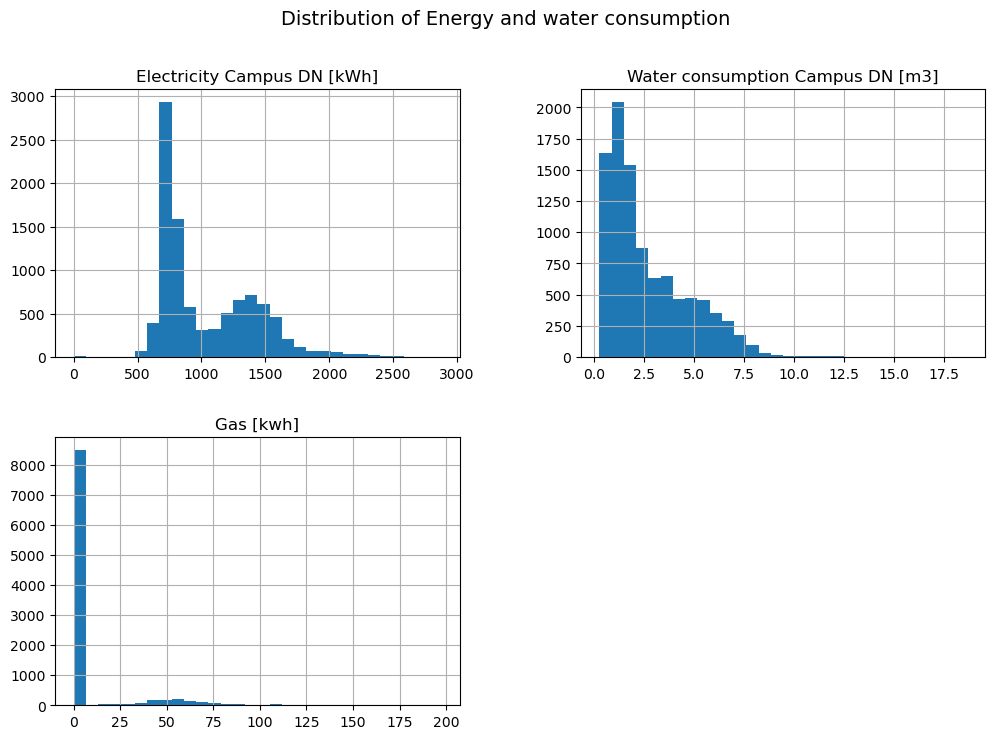

In [30]:
# Minimum and maximum values for the energy and water columns
for col in ['Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Gas [kwh]']: 
    if col in data.columns:
       print(f"{col}: min={data[col].min()}, max={data[col].max()}")

# Histogram for the energy and water columns
data[['Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Gas [kwh]']].hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of Energy and water consumption', fontsize=14)
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

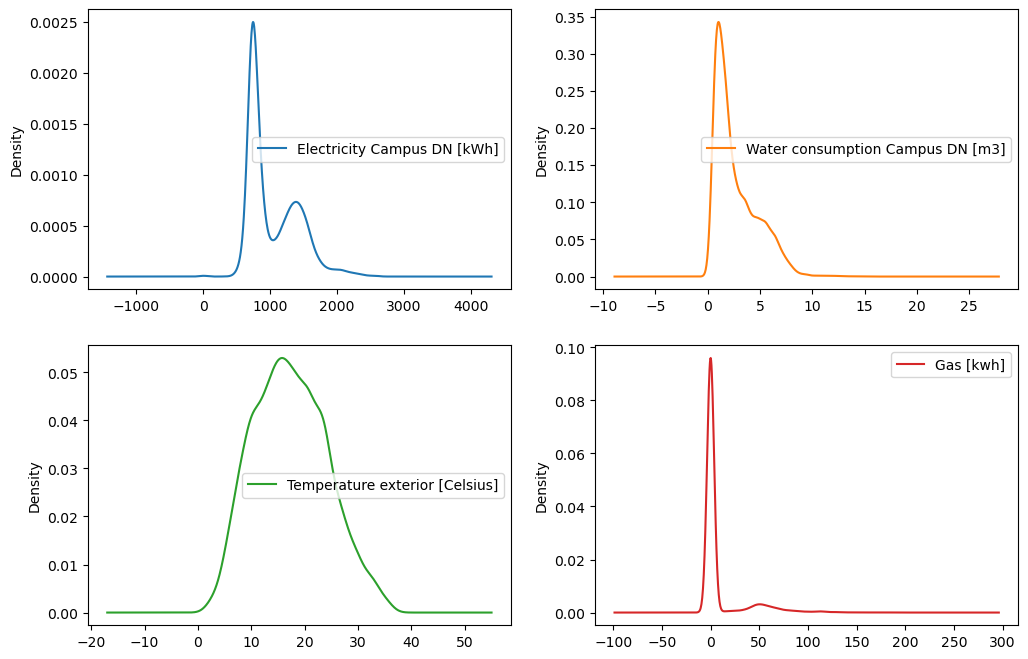

In [36]:
#density plots
cols = ['Electricity Campus DN [kWh]', 'Water consumption Campus DN [m3]', 'Temperature exterior [Celsius]', 'Gas [kwh]']
density = data[cols].plot(kind='kde', subplots=True, layout=(2,2), figsize=(12,8), sharex=False, legend=True)
density

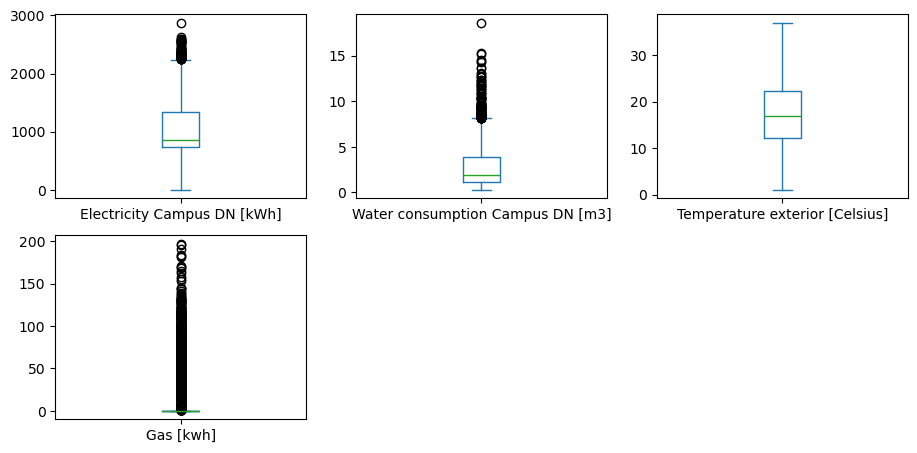

In [37]:
#boxplots
atributos_boxplot = data[cols].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False, sharey=False, fontsize=10)

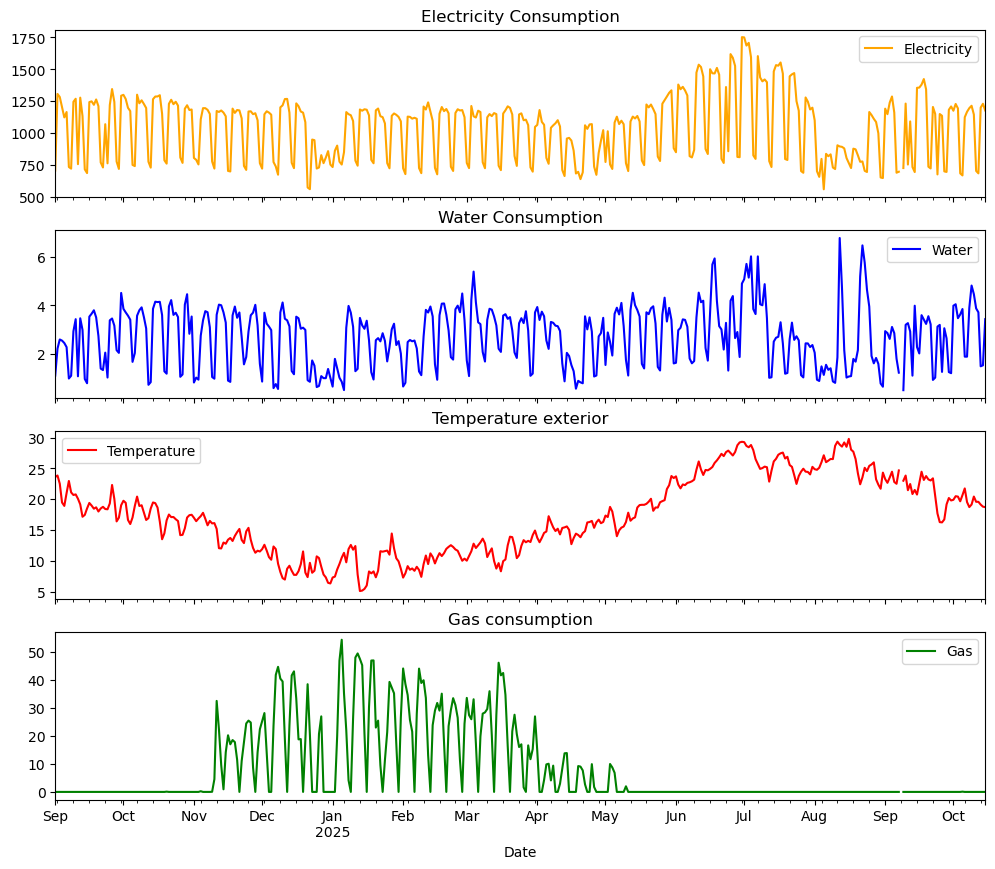

In [45]:
#Changes over time
fig, axes = plt.subplots(4, 1, figsize=(12,10), sharex=True)
data.set_index('Date')['Electricity Campus DN [kWh]'].resample('D').mean().plot(ax=axes[0], color='orange', label='Electricity')
axes[0].set_title('Electricity Consumption')
axes[0].legend()
data.set_index('Date')['Water consumption Campus DN [m3]'].resample('D').mean().plot(ax=axes[1], color='blue', label='Water')
axes[1].set_title('Water Consumption')
axes[1].legend()
data.set_index('Date')['Temperature exterior [Celsius]'].resample('D').mean().plot(ax=axes[2], color='red', label='Temperature')
axes[2].set_title('Temperature exterior')
axes[2].legend()
data.set_index('Date')['Gas [kwh]'].resample('D').mean().plot(ax=axes[3], color='green', label='Gas')
axes[3].set_title('Gas consumption')
axes[3].legend()

In [61]:
#Valleys in water and electricity consumption coincide with the winter and summer holiday periods
#As the temperature increases, there is a noticeable rise in electricity consumption, likely due to air conditioning, and a smaller increase in water usage
#Gas consumption clearly follows the winter, as it is mainly used for heating. The negative peaks correspond to weekends, when the heating is turned off

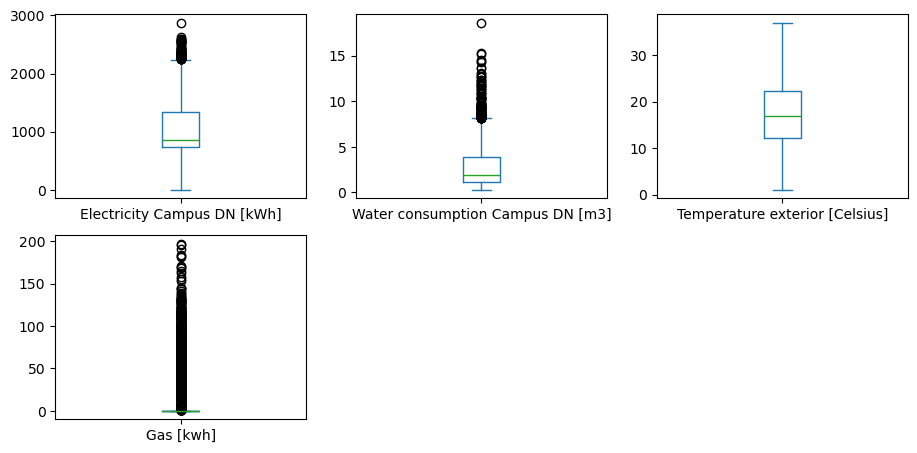

In [46]:
#boxplots
boxplot = data[cols].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False, sharey=False, fontsize=10)

In [47]:
#Gas has a lot of ouliers but that is because normally the heating is not turned on.
#Temperature resambles a normal distribution so during the study period there were no days out of the ordinary
#Lets clean the water consumption as it clearly shows an outlier (could be a leak or maintenance day for watering the campus)

#using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


df_no_outliers_iqr = remove_outliers_iqr(data, 'Water consumption Campus DN [m3]')

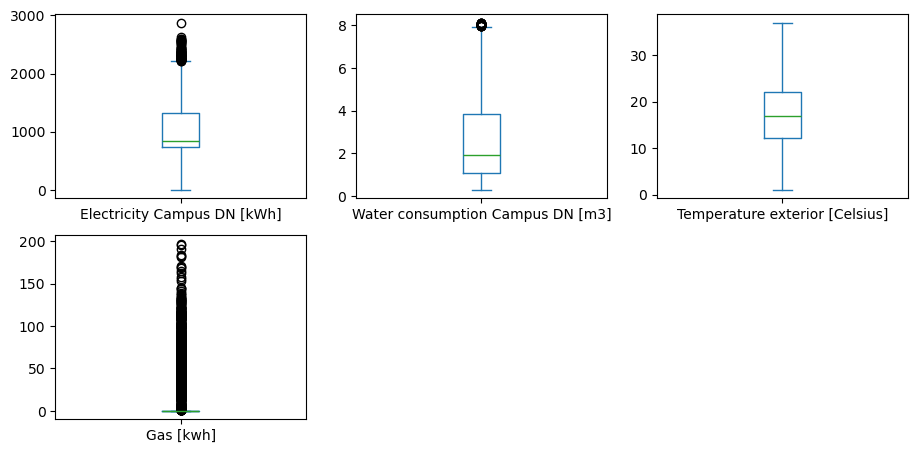

In [48]:
boxplot_clean = df_no_outliers_iqr[cols].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False, sharey=False, fontsize=10)

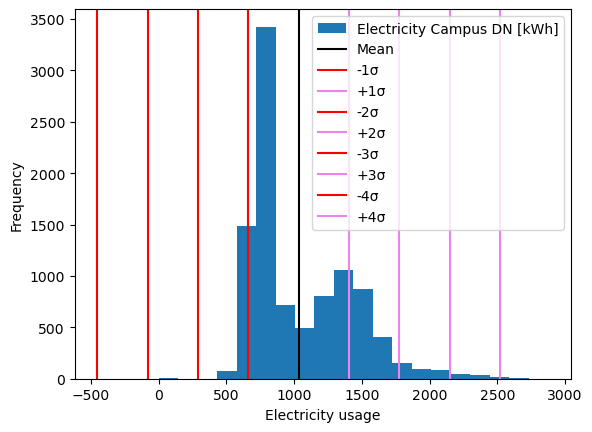

In [58]:
#There is still an outlier in electricity use, lets use a broad Z-Score Method
#a broader Z-score because the electricity usage is right skewed so it would cut a lot of real high spikes, seems more reasonable as to not lose seasonal events
#removing 3σ data points seems a bit overcleaning

mean = df_no_outliers_iqr['Electricity Campus DN [kWh]'].mean()
st_dev = df_no_outliers_iqr['Electricity Campus DN [kWh]'].std()
data['Electricity Campus DN [kWh]'].plot.hist(bins=20)
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - 1*st_dev, color = 'Red', label = '-1σ')
plt.axvline(mean + 1*st_dev, color = 'Violet', label = '+1σ')
plt.axvline(mean - 2*st_dev, color = 'Red', label = '-2σ')
plt.axvline(mean + 2*st_dev, color = 'Violet', label = '+2σ')
plt.axvline(mean - 3*st_dev, color = 'Red', label = '-3σ')
plt.axvline(mean + 3*st_dev, color = 'Violet', label = '+3σ')
plt.axvline(mean - 4*st_dev, color = 'Red', label = '-4σ')
plt.axvline(mean + 4*st_dev, color = 'Violet', label = '+4σ')
plt.xlabel('Electricity usage')
plt.legend()

In [57]:
#using a 3.5σ seems fit without overcleaning
from scipy.stats import zscore


def remove_outliers_zscore_broad(data, column):
    z_scores = zscore(data[column])
    print(z_scores)
    return data[(z_scores > -3.5) & (z_scores < 3.5)]
#data already without missing values
df_no_outliers_zscore_broad = remove_outliers_zscore_broad(df_no_outliers_iqr, 'Electricity Campus DN [kWh]')


[-0.78693433 -0.805782   -0.80308948 ...  0.13660153 -0.37767062
 -0.77347171]


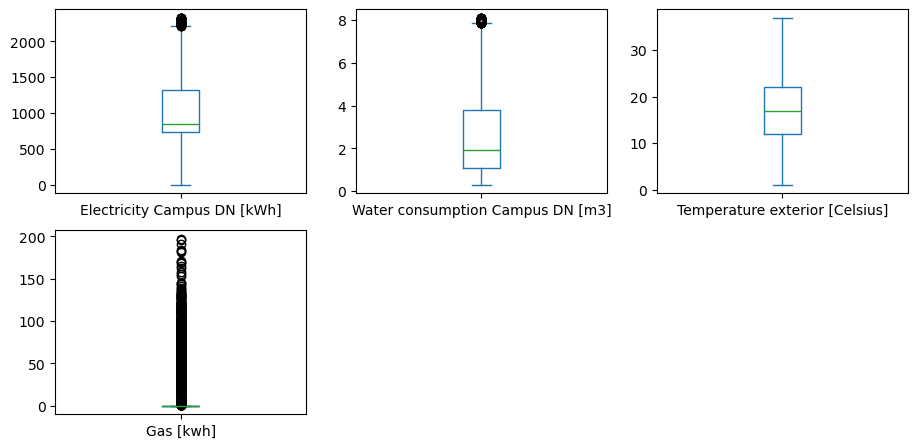

In [60]:
boxplot_clean_2 = df_no_outliers_zscore_broad[cols].plot(kind='box', subplots=True, layout=(4, 3), figsize=(11, 11), sharex=False, sharey=False, fontsize=10)